In [75]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
reference_tracks_path = Path("reference_tracks")
recorded_tracks_path = Path("recorded_tracks")
reference_tracks = [track for track in reference_tracks_path.iterdir() if track.is_file()]
recorded_tracks = [track for track in recorded_tracks_path.iterdir() if track.is_file()]

In [38]:
tracks = {}
for ref in reference_tracks:
    name = ref.stem
    tracks[ref] = [track for track in recorded_tracks if str(track.stem).split("_")[0]==name]

In [40]:
from gps_accuracy.gps_accuracy import GpxEvaluator
results = {}
for k,v in tracks.items():
    name = k.stem
    track_results = []
    for track_file in v:
        evaluator = GpxEvaluator(k, track_file)
        track_results.append(evaluator.evaluate())
    results[name] = track_results

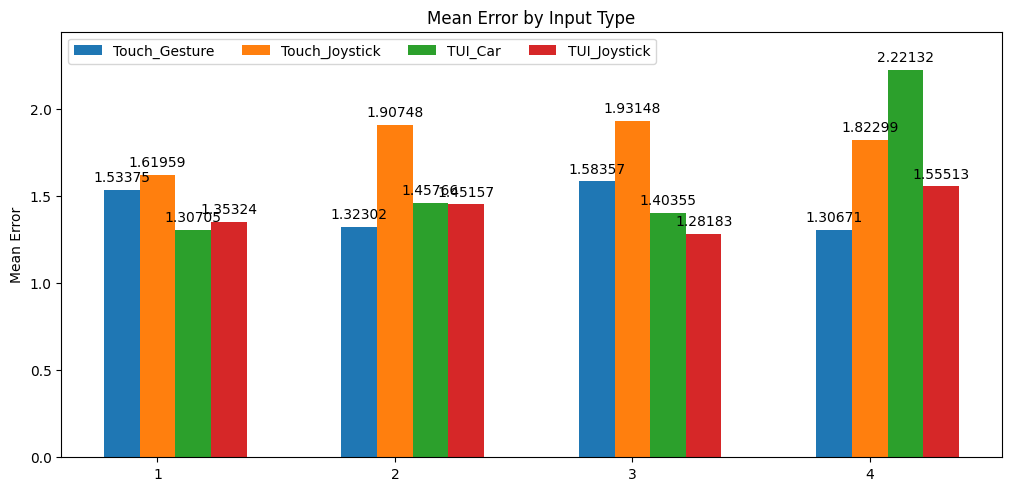

In [77]:
track_names = [name for name in results.keys()]
mean_errors = {
    "Touch_Gesture" : [results[track_name][0].mean for track_name in results.keys()],
    "Touch_Joystick" : [results[track_name][1].mean for track_name in results.keys()],
    "TUI_Car": [results[track_name][2].mean for track_name in results.keys()],
    "TUI_Joystick": [results[track_name][3].mean for track_name in results.keys()]
}

max_value = np.max([x for x in mean_errors.values()])
max_value *= 1.1
x = np.arange(len(track_names))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_figwidth(10)

for attribute, measurement in mean_errors.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Mean Error')
ax.set_title('Mean Error by Input Type')
ax.set_xticks(x + width, track_names)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, max_value)

plt.show()

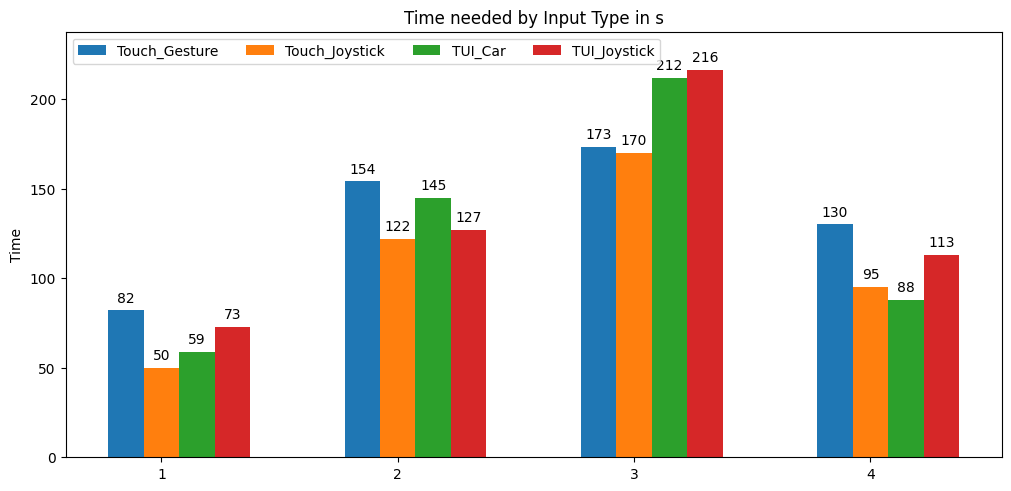

In [78]:
track_names = [name for name in results.keys()]
times = {
    "Touch_Gesture" : [results[track_name][0].time for track_name in results.keys()],
    "Touch_Joystick" : [results[track_name][1].time for track_name in results.keys()],
    "TUI_Car": [results[track_name][2].time for track_name in results.keys()],
    "TUI_Joystick": [results[track_name][3].time for track_name in results.keys()]
}

max_value = np.max([x for x in times.values()])
max_value *= 1.1

x = np.arange(len(track_names))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

fig.set_figwidth(10)

for attribute, measurement in times.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4)
    multiplier += 1

ax.set_ylabel('Time')
ax.set_title('Time needed by Input Type in s')
ax.set_xticks(x + width, track_names)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, max_value)

plt.show()